In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [42]:
# Number of iterations and years
itr = 50000
yrs = 20

# Distribution parameters
ann_ret = 0.08
ann_vol = 0.12

ann_dist = 0.6 
dist_std_dev = 0

ann_contr = 50000000
contr_std_dev = 1000000

# Populate returns, distributions, contributions amounts
returns = pd.DataFrame( np.random.normal(loc=ann_ret, scale=ann_vol, size=(itr, yrs)) )
dist = pd.DataFrame( np.random.normal(loc=ann_dist, scale=dist_std_dev, size=(itr, yrs)) )
contr = pd.DataFrame( np.random.normal(loc=ann_contr, scale=contr_std_dev, size=(itr, yrs)) )

In model 1 we assume the most straightfoward iterative model for computing the following
year's balance:

The balance for successive years is defined iteratively for iteration-$i$ and year-$y$ as 
### $b_{i,y} = b_{i,y-1} + (b_{i,y-1} r_{i,y}) - d_{i,y}(b_{i,y-1} + b_{i,y-1} |r_{i,y}|) + c_{i,y}$ 

where $b\in B$ is the balance matrix, $r\in R$ is the returns matrix, $d\in D$ is the distribution matrix and $c\in C$ is the contributions matrix.

In [43]:
# Initialize balance matrix with $6E9 as initial amount
bal = np.zeros((itr,yrs))
bal[:,0] = 6500000000
bal = pd.DataFrame(bal)

# Initialize distribution tab matrix
dist_tab = pd.DataFrame( np.zeros((itr,yrs)) )

# Simulate 20 years
for i in range(0,itr):
    for y in range(1,yrs):
        bal.iloc[i][y] = bal.iloc[i][y-1] + (bal.iloc[i][y-1] * returns.iloc[i][y]) - dist.iloc[i][y] * (bal.iloc[i][y-1] + bal.iloc[i][y-1] * abs(returns.iloc[i][y])) + contr.iloc[i][y]
        dist_tab.iloc[i][y] = bal.iloc[i][y-1] * dist.iloc[i][y]

# Record sum of all distributions given
dist_tab['Sum'] = dist_tab.sum(axis=1)

# Distributions of Balances, Returns, Contributions, and Distributions

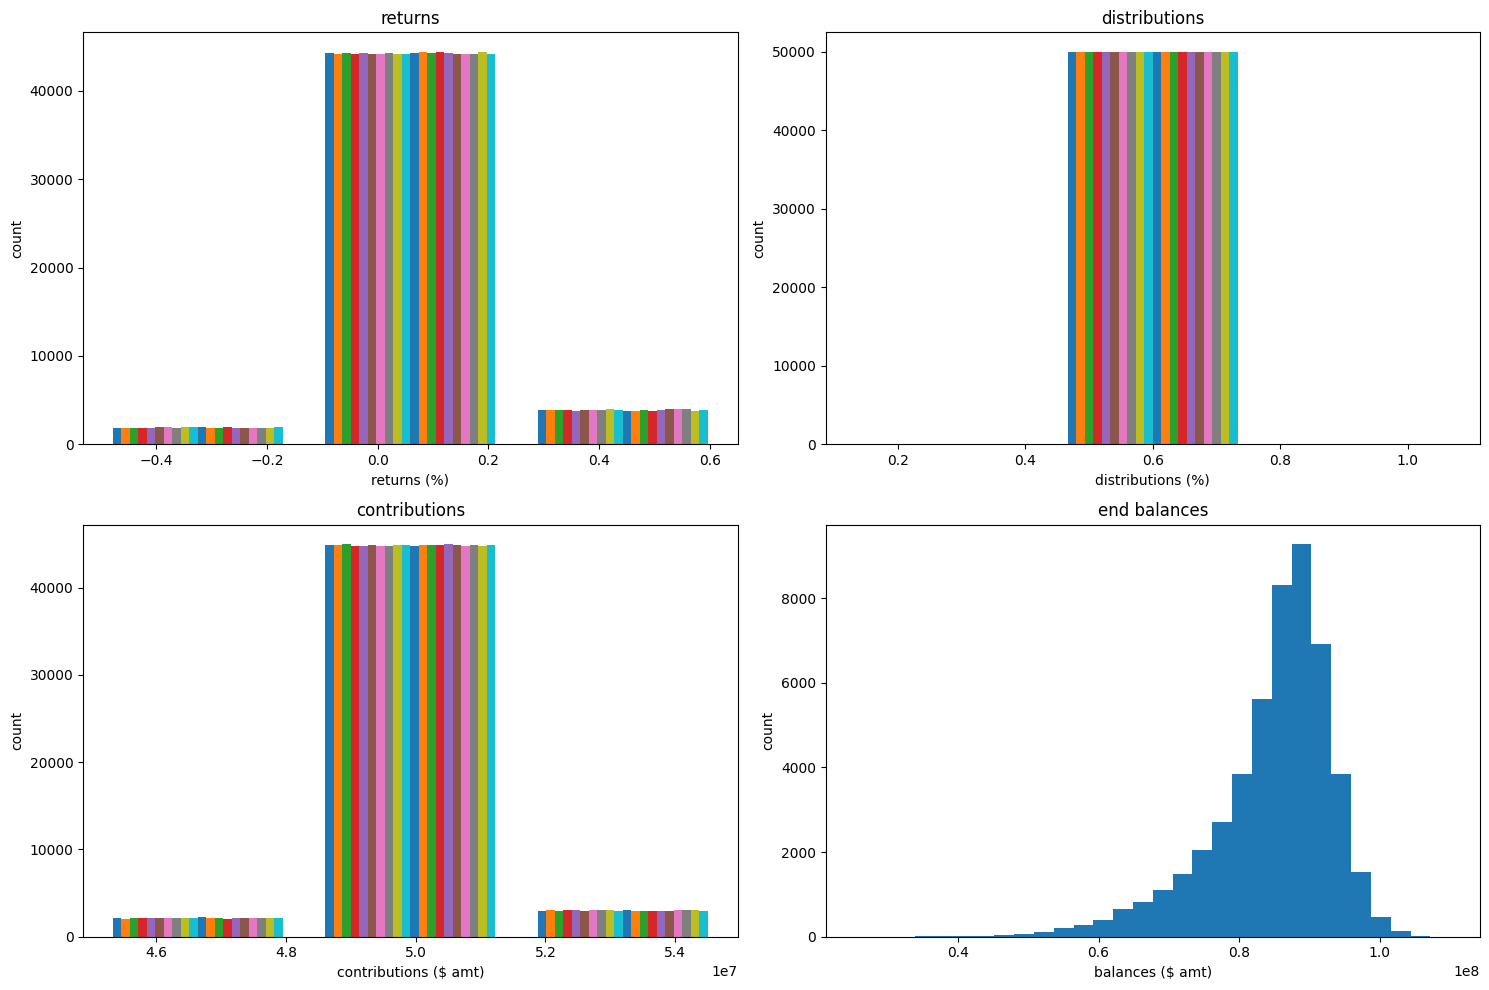

In [44]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for first quadrant
axes[0, 0].hist(returns, bins=3)
axes[0, 0].set_title('returns')
axes[0, 0].set_xlabel('returns (%)')
axes[0, 0].set_ylabel('count')

# Plot for second quadrant
axes[0, 1].hist(dist, bins=3)
axes[0, 1].set_title('distributions')
axes[0, 1].set_xlabel('distributions (%)')
axes[0, 1].set_ylabel('count')

# Plot for third quadrant
axes[1, 0].hist(contr, bins=3)
axes[1, 0].set_title('contributions')
axes[1, 0].set_xlabel('contributions ($ amt)')
axes[1, 0].set_ylabel('count')

# Plot for fourth quadrant
axes[1, 1].hist(bal.iloc[:, -1], bins=30)
axes[1, 1].set_title('end balances')
axes[1, 1].set_xlabel('balances ($ amt)')
axes[1, 1].set_ylabel('count')

# Adjust layout
plt.tight_layout()
plt.show()

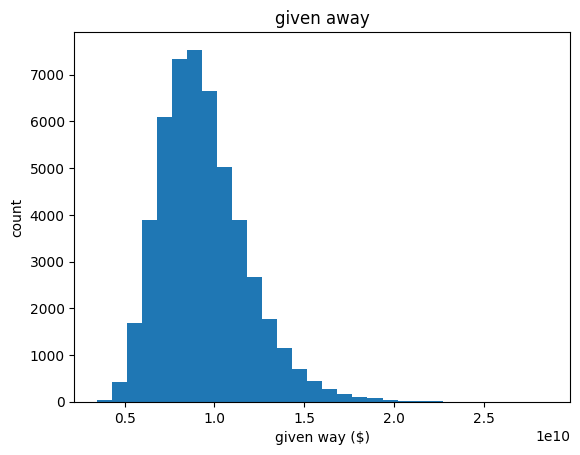

In [33]:
# Create a plot
plt.hist(dist_tab.iloc[:, -1], bins=30)
plt.title('given away')
plt.xlabel('given way ($)')
plt.ylabel('count')

# Show the plot
plt.show()

In [34]:
bal.values.min(), bal.values.max()

(457594689.08342016, 24447843274.26697)

# Plot Portfolio Trajectories

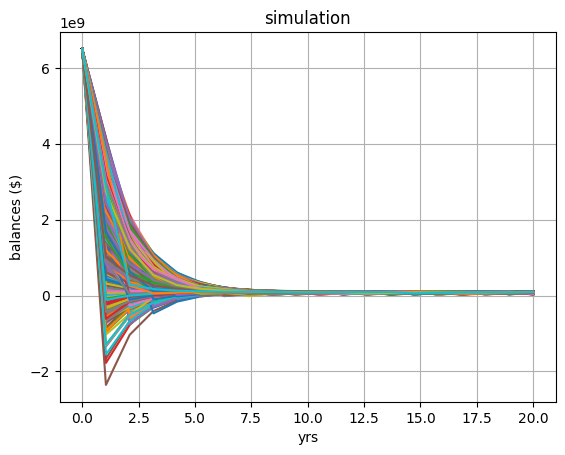

In [45]:
# Assign x and y
x = np.linspace(0, yrs, yrs)  # Generate 100 points from 0 to 10
plt.plot(x,bal.T)

# Adding labels, title, and grid
plt.xlabel('yrs')
plt.ylabel('balances ($)')
plt.title('simulation')
plt.grid(True)  # Optional: Add grid

plt.show()

# See Individual Iteration

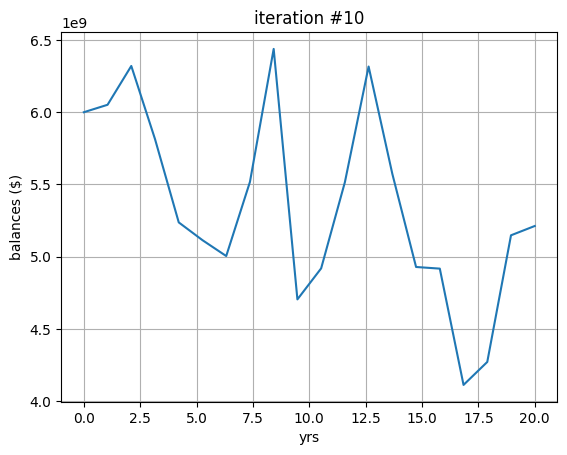

In [36]:
# Assign x and y
sim_no = 10
x = np.linspace(0, yrs, yrs)  # Generate 100 points from 0 to 10
plt.plot(x,bal.iloc[sim_no])

# Adding labels, title, and grid
plt.xlabel('yrs')
plt.ylabel('balances ($)')
plt.title('iteration #' + str(sim_no))
plt.grid(True)  # Optional: Add grid

plt.show()

# Percentile Returns Breakdown

Percentiles [25, 50, 90]: [2.60247100e+09 3.58694279e+09 6.52625531e+09]


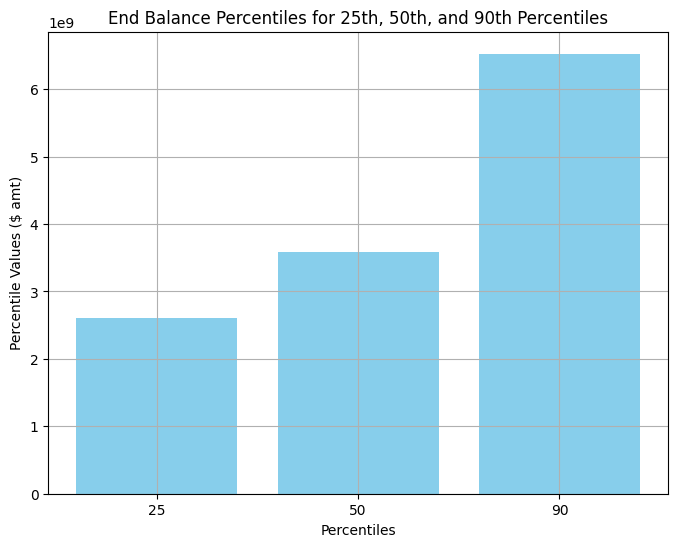

In [37]:
# Define the desired percentiles
percentiles = [25, 50, 90]

# Calculate percentiles using numpy.percentile
percentile_values = np.percentile(bal.iloc[:, -1], percentiles)

print(f"Percentiles {percentiles}: {percentile_values}")

# Plotting the percentiles as a bar chart
plt.figure(figsize=(8, 6))
plt.bar([str(p) for p in percentiles], percentile_values, color='skyblue')
plt.xlabel('Percentiles')
plt.ylabel('Percentile Values ($ amt)')
plt.title('End Balance Percentiles for 25th, 50th, and 90th Percentiles')
plt.grid(True)
plt.show()

# Percentile Donated

Percentiles [25, 50, 90]: [7.68286615e+09 9.08877127e+09 1.25701070e+10]


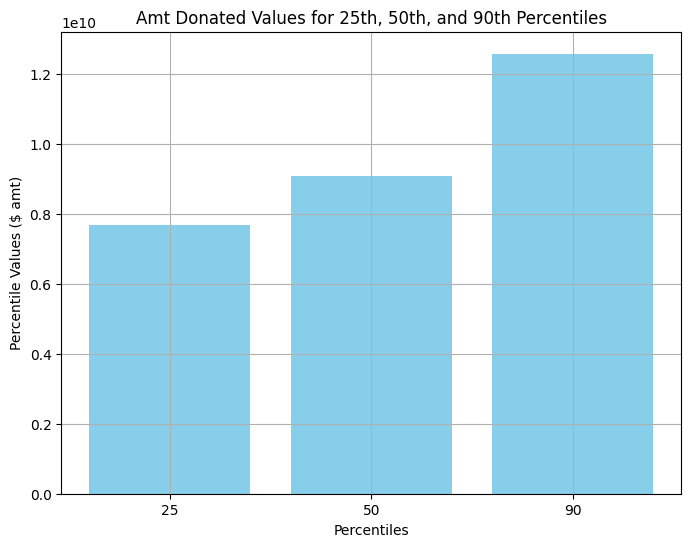

In [38]:
# Define the desired percentiles
percentiles = [25, 50, 90]

# Calculate percentiles using numpy.percentile
percentile_values = np.percentile(dist_tab['Sum'], percentiles)

print(f"Percentiles {percentiles}: {percentile_values}")

# Plotting the percentiles as a bar chart
plt.figure(figsize=(8, 6))
plt.bar([str(p) for p in percentiles], percentile_values, color='skyblue')
plt.xlabel('Percentiles')
plt.ylabel('Percentile Values ($ amt)')
plt.title('Amt Donated Values for 25th, 50th, and 90th Percentiles')
plt.grid(True)
plt.show()

#### Alternative Model
### $b_{i,y} = b_{i,y-1} + (b_{i,y-1} r_{i,y}) - d_{i,y}(b_{i,y-1} + b_{i,y-1} |r_{i,y}|^{0.09}) + c_{i,y}$ 


In [12]:
# OTHER IDEA

# Initialize balance matrix with $6E9 as initial amount
bal = np.zeros((itr,yrs))
bal[:,0] = 6000000000
bal = pd.DataFrame(bal)

# Initialize distribution tab matrix
dist_tab = pd.DataFrame( np.zeros((itr,yrs)) )

# Simulate 20 years
for i in range(0,itr):
    for y in range(1,yrs):
        bal.iloc[i][y] = bal.iloc[i][y-1] + (bal.iloc[i][y-1] * returns.iloc[i][y]) - dist.iloc[i][y] * (bal.iloc[i][y-1] + bal.iloc[i][y-1] * abs(returns.iloc[i][y])**0.09) + contr.iloc[i][y]
        dist_tab.iloc[i][y] = bal.iloc[i][y-1] * dist.iloc[i][y]

# Record sum of all distributions given
dist_tab['Sum'] = dist_tab.sum(axis=1)

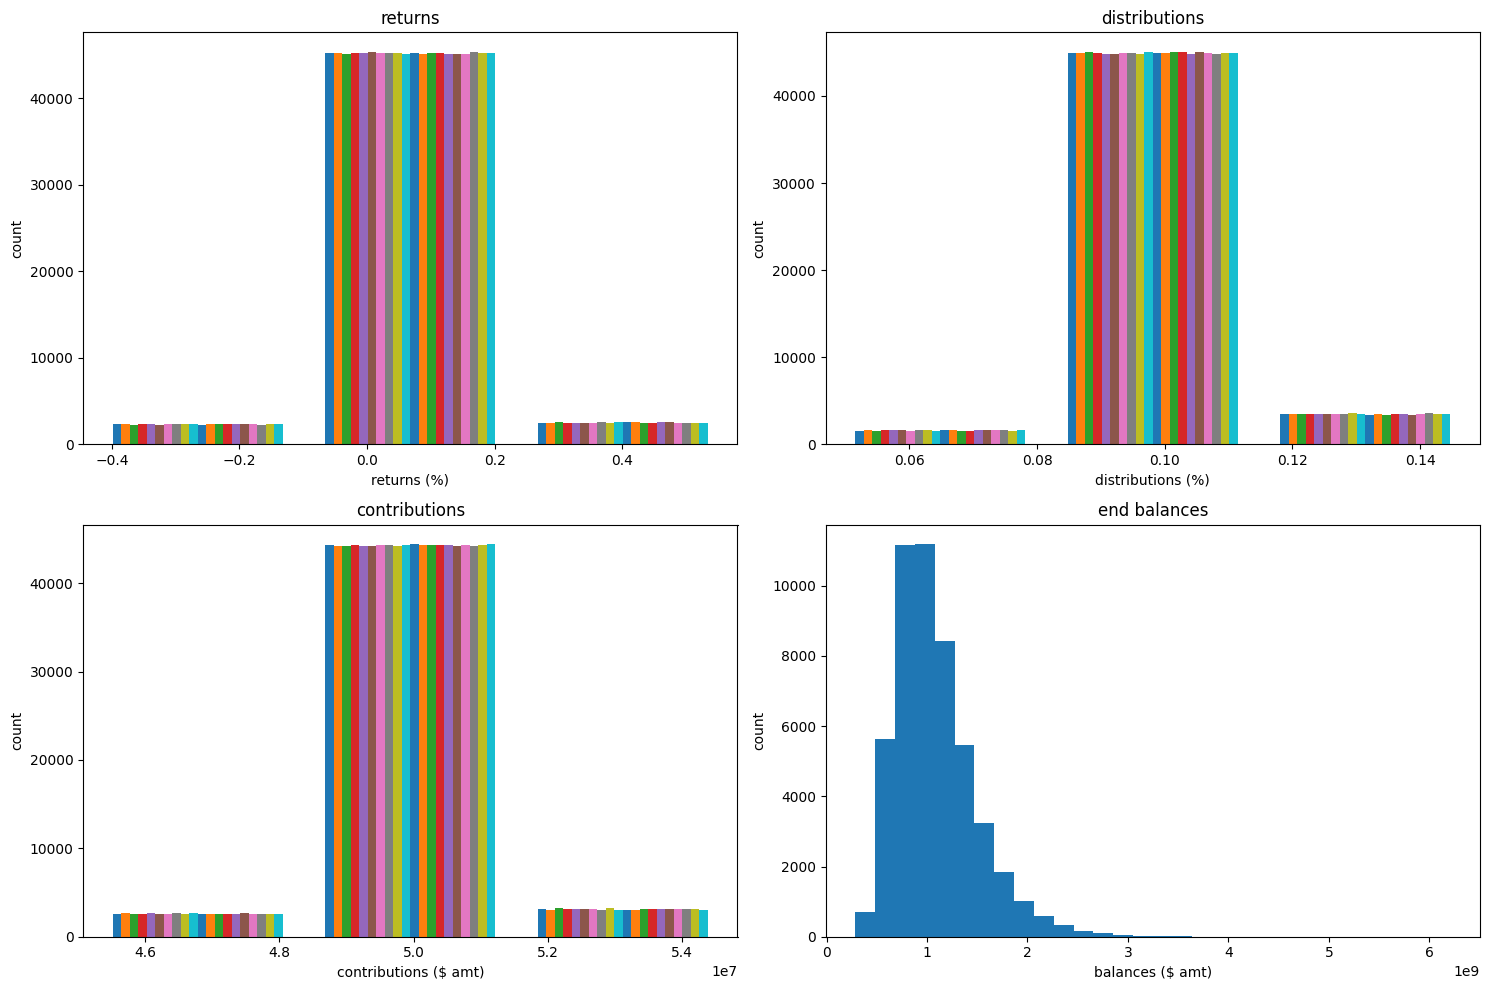

In [13]:
# Create a figure with 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot for first quadrant
axes[0, 0].hist(returns, bins=3)
axes[0, 0].set_title('returns')
axes[0, 0].set_xlabel('returns (%)')
axes[0, 0].set_ylabel('count')

# Plot for second quadrant
axes[0, 1].hist(dist, bins=3)
axes[0, 1].set_title('distributions')
axes[0, 1].set_xlabel('distributions (%)')
axes[0, 1].set_ylabel('count')

# Plot for third quadrant
axes[1, 0].hist(contr, bins=3)
axes[1, 0].set_title('contributions')
axes[1, 0].set_xlabel('contributions ($ amt)')
axes[1, 0].set_ylabel('count')

# Plot for fourth quadrant
axes[1, 1].hist(bal.iloc[:, -1], bins=30)
axes[1, 1].set_title('end balances')
axes[1, 1].set_xlabel('balances ($ amt)')
axes[1, 1].set_ylabel('count')

# Adjust layout
plt.tight_layout()
plt.show()

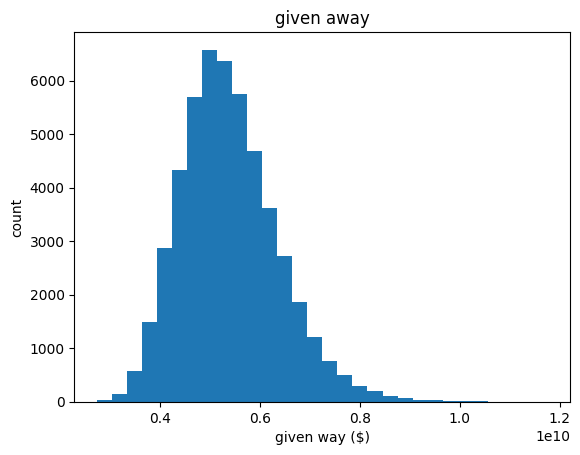

In [14]:
# Create a plot
plt.hist(dist_tab.iloc[:, -1], bins=30)
plt.title('given away')
plt.xlabel('given way ($)')
plt.ylabel('count')

# Show the plot
plt.show()

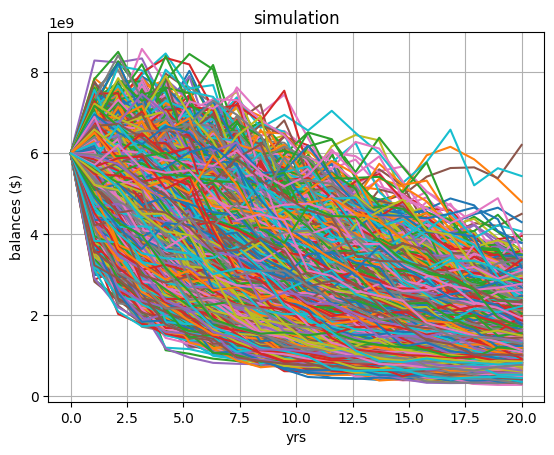

In [15]:
# Assign x and y
x = np.linspace(0, yrs, yrs)  # Generate 100 points from 0 to 10
plt.plot(x,bal.T)

# Adding labels, title, and grid
plt.xlabel('yrs')
plt.ylabel('balances ($)')
plt.title('simulation')
plt.grid(True)  # Optional: Add grid

plt.show()

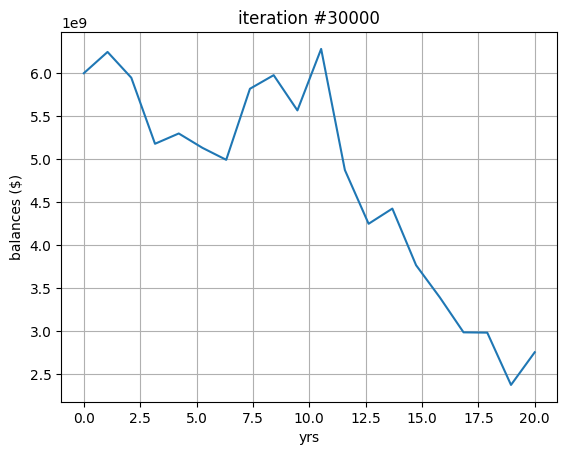

In [28]:
# Assign x and y
sim_no = 30000
x = np.linspace(0, yrs, yrs)  # Generate 100 points from 0 to 10
plt.plot(x,bal.iloc[sim_no])

# Adding labels, title, and grid
plt.xlabel('yrs')
plt.ylabel('balances ($)')
plt.title('iteration #' + str(sim_no))
plt.grid(True)  # Optional: Add grid

plt.show()

Percentiles [25, 50, 90]: [2.60247100e+09 3.58694279e+09 6.52625531e+09]


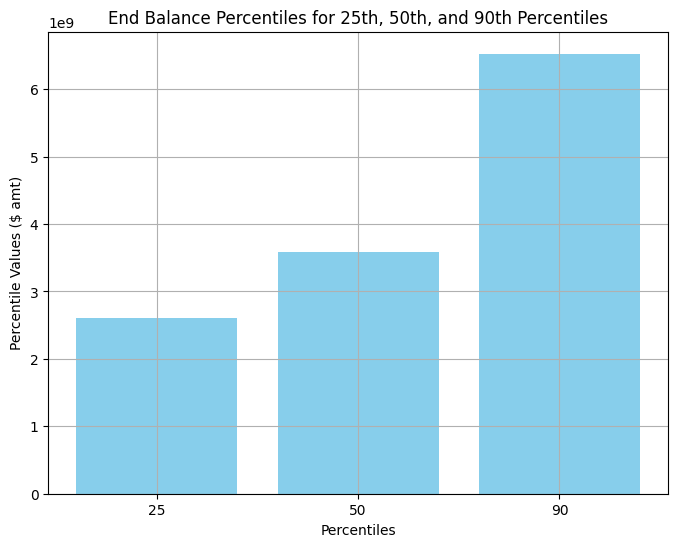

In [39]:
# Define the desired percentiles
percentiles = [25, 50, 90]

# Calculate percentiles using numpy.percentile
percentile_values = np.percentile(bal.iloc[:, -1], percentiles)

print(f"Percentiles {percentiles}: {percentile_values}")


# Plotting the percentiles as a bar chart
plt.figure(figsize=(8, 6))
plt.bar([str(p) for p in percentiles], percentile_values, color='skyblue')
plt.xlabel('Percentiles')
plt.ylabel('Percentile Values ($ amt)')
plt.title('End Balance Percentiles for 25th, 50th, and 90th Percentiles')
plt.grid(True)
plt.show()

Percentiles [25, 50, 90]: [7.68286615e+09 9.08877127e+09 1.25701070e+10]


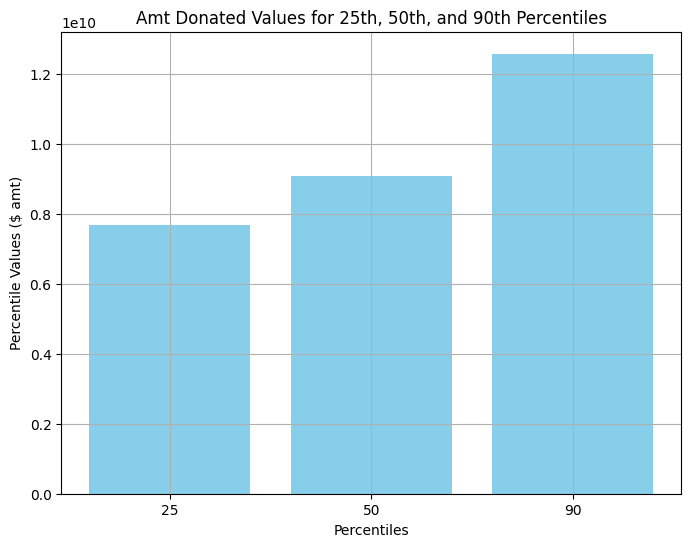

In [40]:
# Define the desired percentiles
percentiles = [25, 50, 90]

# Calculate percentiles using numpy.percentile
percentile_values = np.percentile(dist_tab['Sum'], percentiles)

print(f"Percentiles {percentiles}: {percentile_values}")

# Plotting the percentiles as a bar chart
plt.figure(figsize=(8, 6))
plt.bar([str(p) for p in percentiles], percentile_values, color='skyblue')
plt.xlabel('Percentiles')
plt.ylabel('Percentile Values ($ amt)')
plt.title('Amt Donated Values for 25th, 50th, and 90th Percentiles')
plt.grid(True)
plt.show()

# Hybrid Model

In [19]:
# Initialize balance matrix with $6E9 as initial amount
bal = np.zeros((itr,yrs))
bal[:,0] = 6000000000
bal = pd.DataFrame(bal)

# Initialize distribution tab matrix
dist_tab = pd.DataFrame( np.zeros((itr,yrs)) )

half_1 = int( yrs / 2 )
half_2 = yrs - half_1

# Simulate 20 years
for i in range(0,itr):
    for y in range(1,half_1):
        bal.iloc[i][y] = bal.iloc[i][y-1] + (bal.iloc[i][y-1] * returns.iloc[i][y]) - dist.iloc[i][y] * (bal.iloc[i][y-1] + bal.iloc[i][y-1] * abs(returns.iloc[i][y])) + contr.iloc[i][y]
        dist_tab.iloc[i][y] = bal.iloc[i][y-1] * dist.iloc[i][y]

    for y in range(half_2,yrs):
        bal.iloc[i][y] = bal.iloc[i][y-1] + (bal.iloc[i][y-1] * returns.iloc[i][y]) - dist.iloc[i][y] * (bal.iloc[i][y-1] + bal.iloc[i][y-1] * abs(returns.iloc[i][y])**0.09) + contr.iloc[i][y]
        dist_tab.iloc[i][y] = bal.iloc[i][y-1] * dist.iloc[i][y]

# Record sum of all distributions given
dist_tab['Sum'] = dist_tab.sum(axis=1)

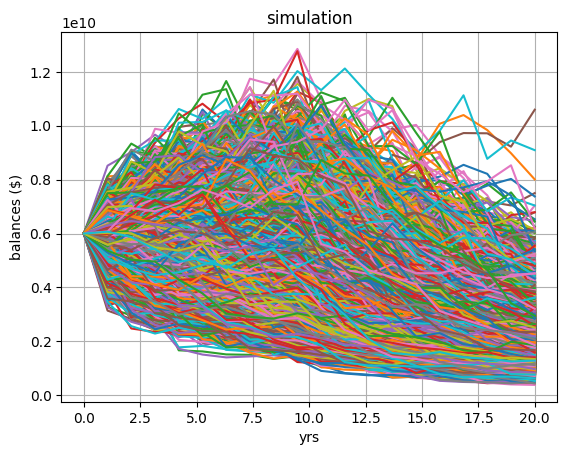

In [20]:
# Assign x and y
x = np.linspace(0, yrs, yrs)  # Generate 100 points from 0 to 10
plt.plot(x,bal.T)

# Adding labels, title, and grid
plt.xlabel('yrs')
plt.ylabel('balances ($)')
plt.title('simulation')
plt.grid(True)  # Optional: Add grid

plt.show()

Percentiles [25, 50, 90]: [1.24968556e+09 1.61726244e+09 2.67237081e+09]


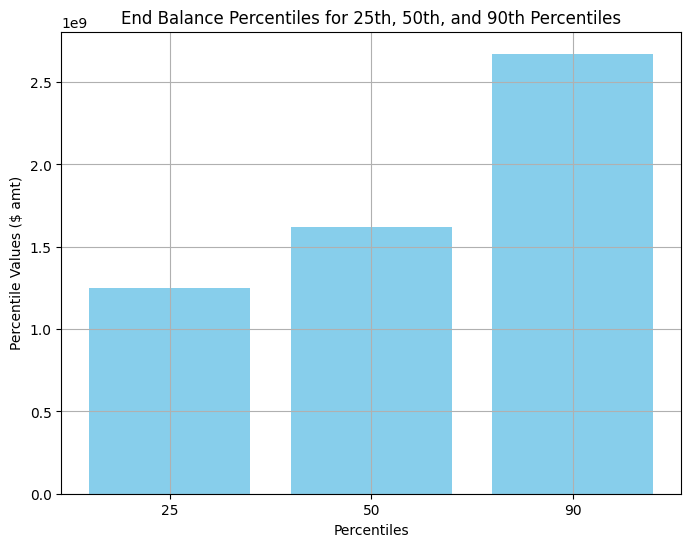

In [21]:
# Define the desired percentiles
percentiles = [25, 50, 90]

# Calculate percentiles using numpy.percentile
percentile_values = np.percentile(bal.iloc[:, -1], percentiles)

print(f"Percentiles {percentiles}: {percentile_values}")


# Plotting the percentiles as a bar chart
plt.figure(figsize=(8, 6))
plt.bar([str(p) for p in percentiles], percentile_values, color='skyblue')
plt.xlabel('Percentiles')
plt.ylabel('Percentile Values ($ amt)')
plt.title('End Balance Percentiles for 25th, 50th, and 90th Percentiles')
plt.grid(True)
plt.show()

Percentiles [25, 50, 90]: [6.72778029e+09 7.65231557e+09 9.80083467e+09]


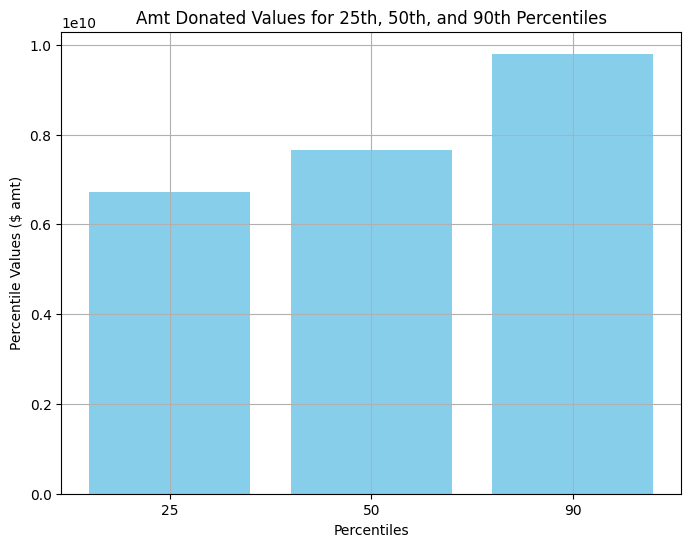

In [22]:
# Define the desired percentiles
percentiles = [25, 50, 90]

# Calculate percentiles using numpy.percentile
percentile_values = np.percentile(dist_tab['Sum'], percentiles)

print(f"Percentiles {percentiles}: {percentile_values}")

# Plotting the percentiles as a bar chart
plt.figure(figsize=(8, 6))
plt.bar([str(p) for p in percentiles], percentile_values, color='skyblue')
plt.xlabel('Percentiles')
plt.ylabel('Percentile Values ($ amt)')
plt.title('Amt Donated Values for 25th, 50th, and 90th Percentiles')
plt.grid(True)
plt.show()